# CCT Dataset
Caltech Camera Traps - released in 2018.

Infos at https://beerys.github.io/CaltechCameraTraps/

In [1]:
import json
import pandas as pd
from collections import Counter

In [2]:
with open('cct_labels_class.json') as json_file:
    data = json.load(json_file)

## Data structure

243,100 images, labelled with 245,118 annotations into 22 categories

In [3]:
data.keys()

dict_keys(['images', 'annotations', 'categories', 'info'])

In [4]:
len(data['annotations'])

245118

In [5]:
len(data['images'])

243100

In [6]:
len(data['categories'])

22

### Image info
Each image belongs to **sequence**:
- `seq_id`: id of the sequence,
- `seq_num_frames`: number of frames in that sequence,
- `frame_num`: frame number of the individual image in that sequence

Besides that, each image has a **unique image id**:
- `id`: unique image id

In [7]:
data['images'][0]

{'seq_num_frames': 1,
 'date_captured': '2013-10-04 13:31:53',
 'seq_id': '6f2160eb-5567-11e8-990e-dca9047ef277',
 'height': 1494,
 'width': 2048,
 'location': '26',
 'rights_holder': 'Erin Boydston',
 'file_name': 'train_val/5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg',
 'id': '5968c0f9-23d2-11e8-a6a3-ec086b02610b',
 'frame_num': 1}

In [8]:
image_ids = [image['id'] for image in data['images']]
image_ids = pd.Series(image_ids)
image_ids.nunique()

243100

### Annotation info
Each annotation has its own **unique annotation id**:
- `id`: unique annotation id

Each annotation **associates a label to an image**:
- `image_id`: image this annotation relates to
- `category_id`: label (category) for that image

In [9]:
data['annotations'][0]

{'id': '207268a3-7d5b-11e7-884d-7845c41c2c67',
 'category_id': 6,
 'image_id': '58d61304-23d2-11e8-a6a3-ec086b02610b'}

### Category info

Each category has a **unique id**:
- `id`: unique id for this category
- `name`: class name for this category

In [10]:
data['categories'][0]

{'name': 'bobcat', 'id': 6}

### Class imbalance
Class representation in the annotations is widely imbalanced.

**More than half (51.3%) of the annotations are the "empty" (id=30) class.**

In contrast, categories "pig" (id=39), "bat" (id=66) and "insect (id=97) are underrepresented with less than 10 annotations each. 

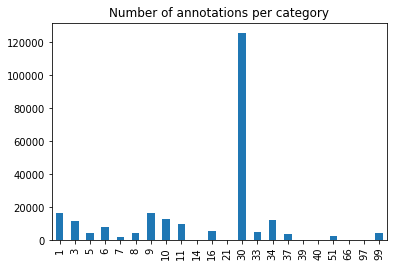

In [11]:
labels = [annotation['category_id'] for annotation in data['annotations']]
series_labels = pd.Series(labels)
series_labels.value_counts().sort_index().plot(kind='bar', title="Number of annotations per category")

In [12]:
data['categories'][2]

{'name': 'empty', 'id': 30}

In [13]:
nb_empty_annotations = series_labels.value_counts().sort_index()[30]
nb_total_annotations = len(series_labels)
prop_empty = nb_empty_annotations / nb_total_annotations
round(prop_empty, 3)

0.513

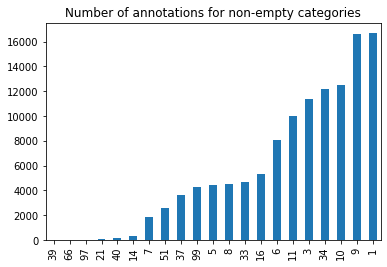

In [14]:
series_labels.value_counts().sort_values()[:-1].plot(kind='bar', title="Number of annotations for non-empty categories")

In [15]:
data['categories'][-4:]

[{'name': 'pig', 'id': 39},
 {'name': 'mountain_lion', 'id': 40},
 {'name': 'bat', 'id': 66},
 {'name': 'insect', 'id': 97}]

In [16]:
data['info']

{'year': 2018,
 'contributor': 'Sara Beery',
 'date_created': '2018-07-03 18:34:36.573636',
 'version': '20200316',
 'description': 'Caltech Camera Traps: Database of camera trap images collected from the NPS and the USGS with help from Justin Brown and Erin Boydston'}

### Linking images and labels
eg: image id `5858bf1e-23d2-11e8-a6a3-ec086b02610b`

In [18]:
data['images'][0]

{'seq_num_frames': 1,
 'date_captured': '2013-10-04 13:31:53',
 'seq_id': '6f2160eb-5567-11e8-990e-dca9047ef277',
 'height': 1494,
 'width': 2048,
 'location': '26',
 'rights_holder': 'Erin Boydston',
 'file_name': 'train_val/5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg',
 'id': '5968c0f9-23d2-11e8-a6a3-ec086b02610b',
 'frame_num': 1}

In [19]:
data['annotations'][0]

{'id': '207268a3-7d5b-11e7-884d-7845c41c2c67',
 'category_id': 6,
 'image_id': '58d61304-23d2-11e8-a6a3-ec086b02610b'}

In [22]:
data['categories'][0]

{'name': 'bobcat', 'id': 6}

## BBox labels

bounding box annotations for a subset of **57,864 images** from 20 locations

### Annotation info
Each annotation has its own **unique annotation id**:
* `id`: unique annotation id

Each annotation associates a **label** and a **bbox** to an image:
* `image_id`: image this annotation relates to
* `category_id`: label (category) for that image
* `bbox`: [x, y, width, height] coordinates and size of the bounding box

In [25]:
with open('cct_labels_bbox.json') as json_file:
    bbox = json.load(json_file)

In [26]:
bbox.keys()

dict_keys(['info', 'categories', 'annotations', 'images'])

In [27]:
bbox['annotations'][0]

{'image_id': '5998cfa4-23d2-11e8-a6a3-ec086b02610b',
 'id': '2a545520-cbf1-11e8-819c-970a9450cdbc',
 'bbox': [499.2, 711.68, 353.28000000000003, 199.67999999999995],
 'category_id': 1}

In [30]:
!ls images

5858bf1e-23d2-11e8-a6a3-ec086b02610b.jpg
